In [1]:
import rasterio as rio

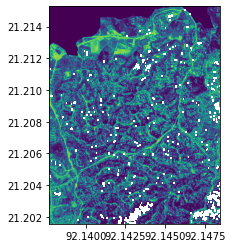

In [2]:
data=rio.open("Satellite_image_camp-4.tif")
from rasterio.plot import show
show(data)

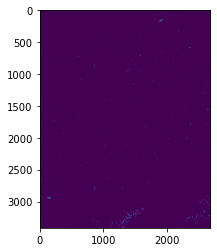

In [6]:
red = data.read(1)
green = data.read(2)
blue = data.read(3)
show(red)

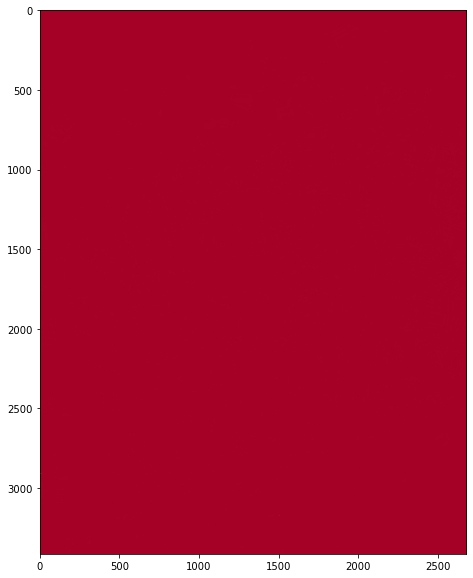

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
show(blue, cmap="RdYlGn", ax=ax)

In [12]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
VARI = (green - red)/((green + red) - blue)

In [ ]:
show(VARI)

In [15]:
with rio.open("vari_4.tif", "w",
             driver="GTiff",
             width=data.width,
             height=data.height,
             count=1,
             crs=data.crs,
             transform=data.transform,
             dtype="float64"
             ) as dst:
    dst.write(VARI, 1)

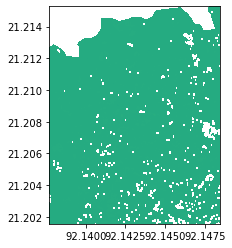

In [17]:
var=rio.open("vari_4.tif")
show(var)

In [18]:
from sklearn.cluster import KMeans

In [20]:
data.shape

(3413, 2677)

In [25]:
c4cluster = green.reshape((-1,1))

In [26]:
c4cluster.shape

(9136601, 1)

In [27]:
k_mean = KMeans(n_clusters=5)
k_mean.fit(c4cluster)

KMeans(n_clusters=5)

In [28]:
clusters = k_mean.labels_
clusters

array([2, 2, 2, ..., 3, 3, 3])

In [29]:
c4cluster_image = clusters.reshape(data.shape)

In [30]:
c4cluster_image.shape

(3413, 2677)

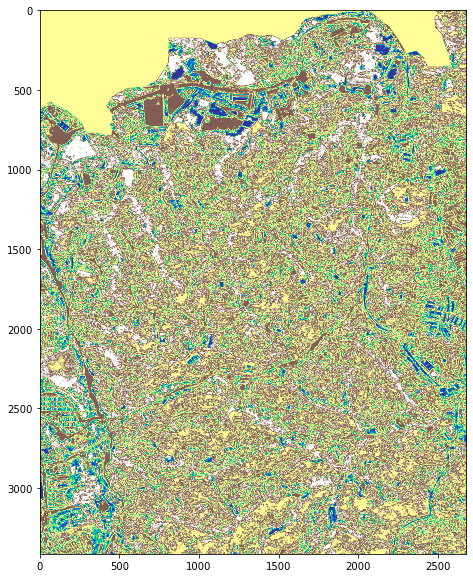

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
show(c4cluster_image, cmap="terrain", ax=ax)

In [32]:
with rio.open("c4cluster.tif", "w",
             driver="GTiff",
             width=data.width,
             height=data.height,
             count=1,
             crs=data.crs,
             transform = data.transform,
             dtype="int32"
             ) as dst:
    dst.write(c4cluster_image, 1)